# Spatial Dataframes 1: Creating them using GeoPandas
ENV 859 - Fall 2024  
© John Fay, Duke University

### What is a spatial dataframe
A **spatial dataframe** (aka a **geodataframe** or **spatially enabled dataframe**) is much like a typical Pandas dataframe except that it accomodates a new datatype:  ***geometries*** . Geometries, as you might guess represent geometric features: points, lines, and polygons -- each of which is defined by a one or series of coordinate pairs. These spatial dataframes are also assigned a **coordinate reference system (crs)** which links these coordinates to specific places on the Earth and allows us to do geospatial analysis. In other words, these spatial dataframes are quite the same as our familiar GIS feature classes!

### Libraries for working with spatial dataframes
To work with spatial dataframes, we need one of two Python libraries, each of which has its own version of the spatial dataframe and its own set of functions and classes. First is **geopandas**, which has been around for a while, and then there's the newcomer, the **ArcGIS API for Python** (which really needs a better name). In this notebook we explore the former, **geopandas**, focusing in on how we create the GeoDataframes from existing data in various formats. The ArcGIS API for Python will be examined in a different notebook.

## Lesson 1 - Constructing Spatial Dataframes
Before seeing what we can do with spatial dataframes, we need to learn how to construct them in our coding environment. So, our first lesson examines just that. Spatial data can be stored in various formats, and here we look at the methods for importing data stored in the more common formats into a GeoPandas spatial dataframe -- often called a ***geodataframe***. 

The source formats we examine include:
1. [A delimited text file (e.g. CSV) containing coordinate columns and a know coordinate reference system](#1.1---Creating-spatial-dataframes-from-CSV-files-using-GeoPandas)
2. [An existing feature class in the form of a shapefile or within a geodatabase](#1.2:-Creating-spatial-dataframes-from-existing-feature-classes)
3. [Other formats: GeoJSON files, KML, and [kind of] GeoDatabases](#1.3---Creating-spatial-dataframes-from-other-file-formats)

### 1.1 - Creating spatial dataframes from CSV files using GeoPandas
In this example, we examine how to create a point spatial dataframe from a CSV file containing latitude and longitude coordinates. The data we'll use in this exercise is electric vehicle charging locations in North Carolina obtained from the Alternative Fuels Data Center ([link](https://afdc.energy.gov/data_download)). These data, stored in the `NC_Charging_Stations.csv` file in the `data` folder, have been downloaded and preprocesed to subset records falling within North Carolina, and to remove extraneous columns.

The process of importing a CSV file into a GeoPandas geodataframe consists of first importing the data into a Pandas dataframe and then creating a **GeoSeries** - or column of geometry objects - from the coordinate columns. Then we construct the geodataframe using the GeoPandas `GeoDataFrame()` function supplying the original dataframe, the geoseries object, and the coordinate reference system or `crs`. 

#### Step 1. Importing the data into a Pandas dataframe

In [1]:
#Import libraries: Pandas (as "pd") and geopandas (as "gpd")
import pandas as pd
import geopandas as gpd

In [2]:
#Read the EV Charging station data into a Pandas dataframe
df = pd.read_csv('../data/NC_Charging_Stations.csv')

In [3]:
#Examine the first few rows, noting the data include "latitude"  "longitude" columns
df.head()

,ID,Fuel Type Code,Station Name,City,State,ZIP,Status Code,Latitude,Longitude,Facility Type
0,39016,ELEC,City of Raleigh - Municipal Building,Raleigh,NC,27601,E,35.778416,-78.643470,STREET_PARKING
1,39017,ELEC,City of Raleigh - Downtown,Raleigh,NC,27601,E,35.774350,-78.642287,STREET_PARKING
2,40066,ELEC,Modern Nissan - Concord,Concord,NC,28027,E,35.392063,-80.622777,CAR_DEALER
3,40067,ELEC,Fred Anderson Nissan,Fayetteville,NC,28304,E,35.042419,-78.956747,CAR_DEALER
4,40068,ELEC,Vann Yorks High Point Nissan,High Point,NC,27260,E,35.937981,-79.996012,CAR_DEALER


#### Step 2. Creating a column of geometric objects (i.e., a GeoSeries) 
To create a geoseries, we use the geopandas `points_from_xy()` function.

In [4]:
#Show info on the command
gpd.points_from_xy?

Signature: gpd.points_from_xy(x, y, z=None, crs=None)
Docstring:
Generate GeometryArray of shapely Point geometries from x, y(, z) coordinates.

In case of geographic coordinates, it is assumed that longitude is captured by
``x`` coordinates and latitude by ``y``.

Parameters
----------
x, y, z : iterable
crs : value, optional
    Coordinate Reference System of the geometry objects. Can be anything accepted by
    :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
    such as an authority string (eg "EPSG:4326") or a WKT string.

Examples
--------
>>> import pandas as pd
>>> df = pd.DataFrame({'x': [0, 1, 2], 'y': [0, 1, 2], 'z': [0, 1, 2]})
>>> df
   x  y  z
0  0  0  0
1  1  1  1
2  2  2  2
>>> geometry = geopandas.points_from_xy(x=[1, 0], y=[0, 1])
>>> geometry = geopandas.points_from_xy(df['x'], df['y'], df['z'])
>>> gdf = geopandas.GeoDataFrame(
...     df, geometry=geopandas.points_from_xy(df['x'], df['y']))

Having geographic coordinates:

>>> df = pd.DataFram

The essential inputs are a series of x coordinates (our `Longitude` column), a series of y coordinates (our `Latitude` column).

In [5]:
#Create a geoseries object from the coordinate column
geometries = gpd.points_from_xy(
    x=df['Longitude'],
    y=df['Latitude']
)

#### Step 3. Constructing the Geodataframe from the data, the geoseries, and the crs
Next, we use the `GeoDataFrame()` function to construct our geodataframe, attaching our geoseries as its "shape" field. We also, however, need to define the geodataframes's coordinate reference system, which is done by specifing the *well known ID* or **WKID** (really?) of the coordinate system to which our data is referenced.  

>#### ► What is an WKID code?
>All "official" coordinate systems have a unique ID, often defined by the "European Petroleum Survey Group". These ids, often refered to as  "***WKIDs***" (short for "Well Known IDs"), or sometimes as "***EPSG codes***", can be found by looking up the name of the coordinate system on either https://spatialreference.org or https://epsg.io/. For example, the WKID for WGS 84 (to which is what our data is referenced) is [4326](https://spatialreference.org/ref/epsg/wgs-84/).

In [6]:
#View the GeoDataframe() command syntax
gpd.GeoDataFrame?

Init signature: gpd.GeoDataFrame(data=None, *args, geometry=None, crs=None, **kwargs)
Docstring:     
A GeoDataFrame object is a pandas.DataFrame that has a column
with geometry. In addition to the standard DataFrame constructor arguments,
GeoDataFrame also accepts the following keyword arguments:

Parameters
----------
crs : value (optional)
    Coordinate Reference System of the geometry objects. Can be anything accepted by
    :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
    such as an authority string (eg "EPSG:4326") or a WKT string.
geometry : str or array (optional)
    If str, column to use as geometry. If array, will be set as 'geometry'
    column on GeoDataFrame.

Examples
--------
Constructing GeoDataFrame from a dictionary.

>>> from shapely.geometry import Point
>>> d = {'col1': ['name1', 'name2'], 'geometry': [Point(1, 2), Point(2, 1)]}
>>> gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
>>> gdf
    col1                 geometry
0  name1  POINT

In [7]:
#Create a geodataframe from our data
gdf_csv = gpd.GeoDataFrame(
    data=df,
    geometry=geometries,
    crs = 4326
)
#Confirm the type of the object we just created
type(gdf_csv)

geopandas.geodataframe.GeoDataFrame

#### Step 4. Exploring our geodataframe
Now, let's explore our geodataframe using many commands familiar with our exploration of Pandas dataframes. These include:
* `head()` to show the first few records of the dataframe (note the last column)
* `info()` to reveal the structure of the dataframe (note the data type of the last column)
* `crs` to reveal the coordinate reference system the dataset uses
* `plot()` to plot the data

In [8]:
#Show the first few records of the geodataframe
gdf_csv.head()

,ID,Fuel Type Code,Station Name,City,State,ZIP,Status Code,Latitude,Longitude,Facility Type,geometry
0,39016,ELEC,City of Raleigh - Municipal Building,Raleigh,NC,27601,E,35.778416,-78.643470,STREET_PARKING,POINT (-78.64347 35.77842)
1,39017,ELEC,City of Raleigh - Downtown,Raleigh,NC,27601,E,35.774350,-78.642287,STREET_PARKING,POINT (-78.64229 35.77435)
2,40066,ELEC,Modern Nissan - Concord,Concord,NC,28027,E,35.392063,-80.622777,CAR_DEALER,POINT (-80.62278 35.39206)
3,40067,ELEC,Fred Anderson Nissan,Fayetteville,NC,28304,E,35.042419,-78.956747,CAR_DEALER,POINT (-78.95675 35.04242)
4,40068,ELEC,Vann Yorks High Point Nissan,High Point,NC,27260,E,35.937981,-79.996012,CAR_DEALER,POINT (-79.99601 35.93798)


In [9]:
#Show the structure of the dataframe
gdf_csv.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              1227 non-null   int64   
 1   Fuel Type Code  1227 non-null   object  
 2   Station Name    1227 non-null   object  
 3   City            1227 non-null   object  
 4   State           1227 non-null   object  
 5   ZIP             1227 non-null   object  
 6   Status Code     1227 non-null   object  
 7   Latitude        1227 non-null   float64 
 8   Longitude       1227 non-null   float64 
 9   Facility Type   450 non-null    object  
 10  geometry        1227 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(7)
memory usage: 105.6+ KB


In [10]:
#Show the geodataframe's coordinate reference system
gdf_csv.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
#Show just the EPSG code of the crs
gdf_csv.crs.to_epsg()

4326

In [13]:
#Project to UTM Zone 17N 
gdf_utm = gdf_csv.to_csv('32617')

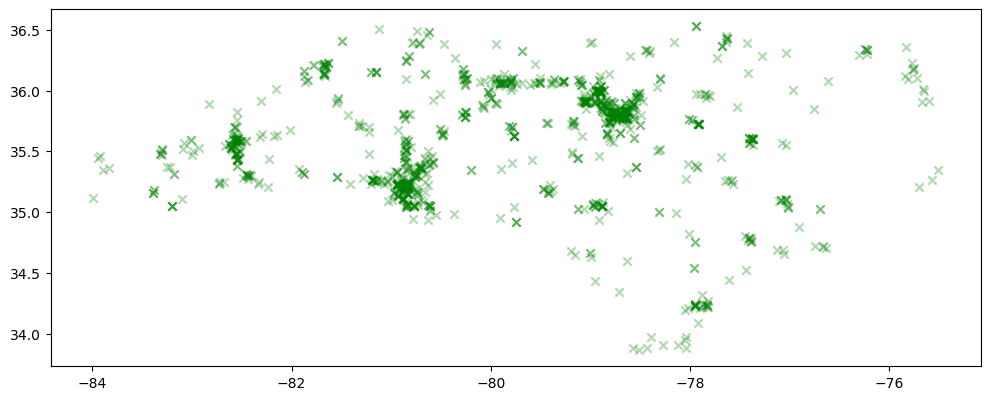

In [14]:
#Plot the data
gdf_csv.plot(color='Green', marker='x', alpha=0.3, figsize=(12,7));

And that's it! Pretty straight forward. Soon we will explore the various analyses and visualizations we can do with these spatial dataframes, but first, we'll examine a few other types of data we can import into our coding environment as geodataframes

### 1.2: Creating spatial dataframes from existing feature classes
Here we look at the process of getting existing feature classes, e.g. Shapefiles, into spatial dataframes. We'll again look at methods using GeoPandas and then compare that with similar methods using the ArcGIS API for Python. 

The dataset we'll use represents major river basins of North Carolina (source: https://data-ncdenr.opendata.arcgis.com/datasets/ncdenr::major-river-basins), a copy of which has been downloaded into the data folder as `Major_Basins.shp`. 

#### Step 1. Importing shapefiles using `read_file()`
Importing feature classes using GeoPandas is easy with the `read_file()` command. 

>What's worth noting is that GeoPandas actually uses the Python **Fiona** package to read the shapefiles. Fiona leverages a collection of drivers that provide access to a number of geospatial data formats. Geopandas simplifies the usage of Fiona commands, making import and export of geodataframes easier to use.

In [15]:
#Explore the read_file() command
gpd.read_file?

Signature:
gpd.read_file(
    filename,
    bbox=None,
    mask=None,
    rows=None,
    engine=None,
    **kwargs,
)
Docstring:
Returns a GeoDataFrame from a file or URL.

.. note::

    GeoPandas currently defaults to use Fiona as the engine in ``read_file``.
    However, GeoPandas 1.0 will switch to use pyogrio as the default engine, since
    pyogrio can provide a significant speedup compared to Fiona. We recommend to
    already install pyogrio and specify the engine by using the ``engine`` keyword
    (``geopandas.read_file(..., engine="pyogrio")``), or by setting the default for
    the ``engine`` keyword globally with::

        geopandas.options.io_engine = "pyogrio"

Parameters
----------
filename : str, path object or file-like object
    Either the absolute or relative path to the file or URL to
    be opened, or any object with a read() method (such as an open file
    or StringIO)
bbox : tuple | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter feature

In [16]:
#Read the shapefile into a GeoPandas geodataframe
gdf_shp = gpd.read_file('../data/Major_Basins.shp')

**Pro tip** -- a shapefile zipped into a single file can also be read in!

In [17]:
#Read a *zipped* shapefile into a GeoPandas geodataframe
gdf_shp = gpd.read_file('../data/Major_River_Basins.zip')

In [18]:
#Examine the data
gdf_shp.head()

,FID,Basin,Sq_Miles,Acres,Name,PlanLink,SHAPE_Leng,SHAPE_Area,geometry
0,1,BRD,1513.894812,9.688927e+05,Broad,https://deq.nc.gov/about/divisions/water-resou...,5.581258e+05,-5.910819e+09,"MULTIPOLYGON (((-9213866.272 4173023.751, -921..."
1,2,CAT,3285.405145,2.102659e+06,Catawba,https://deq.nc.gov/about/divisions/water-resou...,8.567400e+05,-1.289794e+10,"POLYGON ((-9094141.192 4320798.406, -9094170.3..."
2,3,CHO,1298.283191,8.309012e+05,Chowan,https://deq.nc.gov/about/divisions/water-resou...,4.665715e+05,-5.193827e+09,"POLYGON ((-8531329.201 4376184.236, -8531319.6..."
3,4,CPF,9163.594976,5.864701e+06,Cape Fear,https://deq.nc.gov/about/divisions/water-resou...,1.392877e+06,-3.564402e+10,"POLYGON ((-8873544.781 4349237.936, -8873507.1..."
4,5,FBR,2828.806116,1.810436e+06,French Broad,https://deq.nc.gov/about/divisions/water-resou...,7.216967e+05,-1.112308e+10,"POLYGON ((-9151379.603 4322288.985, -9151361.4..."


In [19]:
#What is the crs of the data
gdf_shp.crs.to_string()

'EPSG:3857'

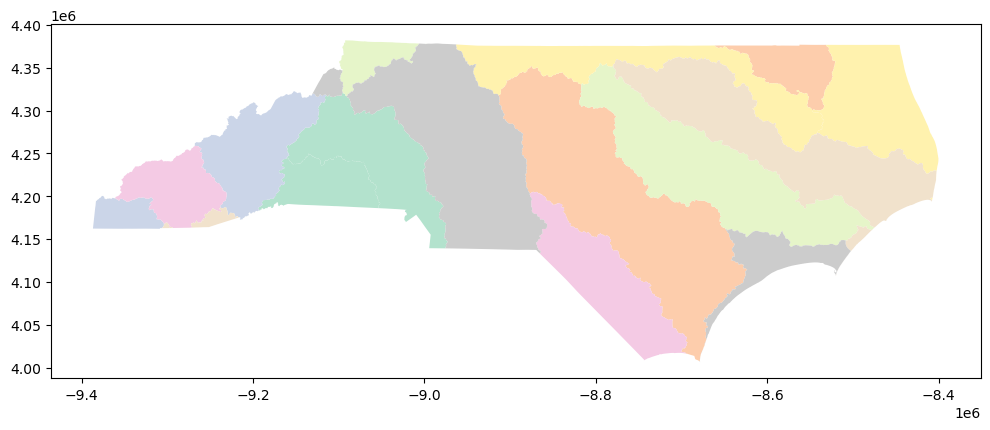

In [20]:
#Plot the data...
gdf_shp.plot(column='Basin', categorical=True, figsize=(12,7), cmap='Pastel2');

### 1.3 - Creating spatial dataframes from other file formats

Now we look at some formats that may be less familiar to you but are becoming more and more common.

#### 1.3.1 - Reading GeoJSON files
We have a GeoJSON format of the major river basins in NC saved in our data folder: `../data/12-Major_River_Basins.geojson` ([source](https://data-ncdenr.opendata.arcgis.com/datasets/ncdenr::major-river-basins/)). Let's see how we go about importing that file. 

>##### What is GeoJSON?
>GeoJSON is a text based format that stores spatial features in a long, but universally readable format (i.e. text!). "JSON" stands for JavaScript Object Notation, and if you look at raw JSON files from a Python perspective, it looks like a set of nested dictionary and list objects. We need not get too deep into that, but understand that being text based, JSON and its spatial counterpart GeoJSON, are used widely in web-based services and can be quite useful in certain circumstances.

As it happens, that Fiona package we read about, the one GeoPandas uses, can read this format as well. We simply have to indicate what **driver** the `read_file()` function should use to conver the file into a geodataframe.

In [21]:
#read in the file 
gdf_geojson = gpd.read_file(
    filename='../data/Major_River_Basins.geojson',
    driver='GeoJSON')

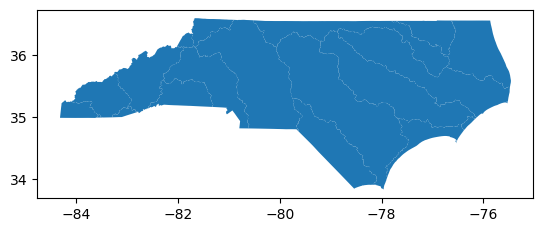

In [22]:
gdf_geojson.plot();

#### 1.3.2 - Reading KML files
We have a GeoJSON format of the major river basins in NC saved in our data folder: `../data/12-Major_River_Basins.geojson` ([source](https://data-ncdenr.opendata.arcgis.com/datasets/ncdenr::major-river-basins/)). Let's see how we go about importing that file. 

>##### ► What is KML?
>KML, short for "Keyhole Markup Language", is yet another text based format developed to store geospatial features. This format was originally desgined to work with the Google Earth application (which was originally developed by a company called Keyhole), but others have adopted this format as well because of its simplicity. 

And yes, Fiona has a driver to work with KML files, but for some reason this driver is not enabled by default. Let's look at all the drivers Fiona can work with by default and how to enable this one. 

In [23]:
#Import Fiona
import fiona

In [24]:
#Display fiona's active drivers
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'Parquet': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

The result is a dictionary where the keys are the driver and the values are what we can do with them: 
* `r` indicates we can read those formats but not write to them
* `rw` indicates we can both read from and write to those formats
* `raw` indicates we can read, write, and append data to existing files in that format

You'll also notice KML does not appear on that list, but we can add it with the code below (where we add it directly to the list the geopandas can see...) What is the complete list of drivers? For some odd reason, that's not easily found, but you can decifer a bit from this page: https://github.com/Toblerity/Fiona/blob/master/fiona/drvsupport.py. (Thanks to this [StackExchange page](https://gis.stackexchange.com/questions/191365/drivers-of-fiona) for revealing this.)

In [25]:
#Enable the KML driver in geopandas as a read-write format
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

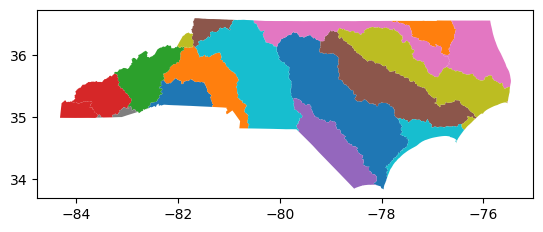

In [26]:
#Read the IML file
gdf_kml = gpd.read_file('../data/Major_River_Basins.kml',driver='KML')
gdf_kml.plot(column='Name');

#### 1.3.3 Reading ESRI Geodatabase files
The ESRI Geodatabase is a tricky format that sits somewhere in the gray area between proprietary and opensource. ESRI does publish enough of how these Geodatabases are structured, programmatically, but that structure evolves quickly -- sometimes faster than coders can update Fiona drivers. 

For example: <https://github.com/Toblerity/Fiona/issues/428>

In any event, those drivers are usually labeled as `OpenFileGDB` and you'd be best off doing a websearch for the latest sequence of commands required to read geodatabase feature classes into a spatial dataframe.